# Alignment
## Load libraries and data

In [1]:
import pandas as pd
import geopandas as gpd
from collections import Counter
import pickle
from matplotlib import pyplot as plt

from alignment import align_on_column, get_fuzzy_dict
from preprocessing import substitute_col_by_dict

In [2]:
# set variable to True if you want to use dataset with profession tags (preprocessed with parts of Ravis Code)
USE_TAGGED_DATASET = False

In [3]:
if USE_TAGGED_DATASET:
    bottins = pd.read_pickle("data/bottins_tagged_prep.pkl")
else:
    bottins = pd.read_pickle("data/bottins_prep.pkl")
    
streets = pd.read_pickle("data/FinalUnique.pkl")
unique_short_s = pd.read_pickle("data/unique_short_streets.pkl")
non_unique_short_s = pd.read_pickle("data/not_unique_short_streets.pkl")

In [4]:
bottins.head(3)

,gallica_ark,page,row,nom,metier,rue,numero,annee,rue_processed
0,bpt6k6282019m,144,0,Aaron,bronzes,passage Choiseal,72 et 74.,1855,passage choiseal
1,bpt6k6282019m,144,1,Aaron (Mic.),manuf. de porcelaines,Bondy,30.,1855,bondy
2,bpt6k6282019m,144,3,Abadie,architecte,Provence,7.,1855,provence


## Align data

In [5]:
long_aligned, not_aligned = align_on_column(df_not_aligned = bottins, df_streets = streets, 
                    mergeOnLeft="rue_processed", mergeOnRight="streetname_prep", align_method="perfect")
u_short_aligned, not_aligned = align_on_column(df_not_aligned = not_aligned, df_streets= unique_short_s, 
                    mergeOnLeft="rue_processed", mergeOnRight="name_prep", align_method="perfect short")
nu_short_aligned, not_aligned = align_on_column(df_not_aligned = not_aligned, df_streets= non_unique_short_s, 
                    mergeOnLeft="rue_processed", mergeOnRight="name_prep", align_method="perfect short")                

c:\Users\Lea\Documents\Uni Aachen\4. Semester\DH-405 Foundation Digital Humanities\project\Paris_City_Project\alignment.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newly_aligned["align_method"] = align_method


Joining on rue_processed and streetname_prep, method:perfect
#total aligned: 1200028, newly aligned: 1200028, not aligned: 3206136


c:\Users\Lea\Documents\Uni Aachen\4. Semester\DH-405 Foundation Digital Humanities\project\Paris_City_Project\alignment.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newly_aligned["align_method"] = align_method


Joining on rue_processed and name_prep, method:perfect short
#total aligned: 1559252, newly aligned: 1559252, not aligned: 1646884


c:\Users\Lea\Documents\Uni Aachen\4. Semester\DH-405 Foundation Digital Humanities\project\Paris_City_Project\alignment.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newly_aligned["align_method"] = align_method


Joining on rue_processed and name_prep, method:perfect short
#total aligned: 481773, newly aligned: 481773, not aligned: 1165111


## Substitute words by dictionary

In [6]:
word_dict = {"boulevard": "boulevard de",
                "boulevard de de ": "boulevard de ",
                "boulevard de d'": "boulevard d'",
                "boulevards": "boulevard des",
                "damede": "dame de",
                "damedes": "dame des",
                "faubourgsaint": "faubourg saint",
                "faubourgpoissonniere": "faubourg poissonniere",
                "faubourgdu": "faubourg du",
                "faubourgmontmartre": "faubourg montmartre",
                "quai jemmapes": "quai de jemmapes",
                "boulevards italiens": "boulevard des italiens",
                "villeneuve": "ville neuve",
                "quai valmy": "quai de valmy",
                "avenue wagram": "avenue de wagram",
                "boulevard de montparnasse": "boulevard du montparnasse"
                }

# substitute abbreviations
not_aligned["rue_processed"] = substitute_col_by_dict(not_aligned["rue_processed"], word_dict)

In [7]:
long_aligned, not_aligned = align_on_column(df_not_aligned = not_aligned, df_streets= streets, 
                    df_aligned = long_aligned, mergeOnLeft="rue_processed", mergeOnRight="streetname_prep", 
                    align_method="perfect")
u_short_aligned, not_aligned = align_on_column(df_not_aligned = not_aligned, df_streets= unique_short_s, 
                    df_aligned= u_short_aligned, mergeOnLeft="rue_processed", mergeOnRight="name_prep", 
                    align_method="perfect short")
nu_short_aligned, not_aligned = align_on_column(df_not_aligned = not_aligned, df_streets= non_unique_short_s, 
                    df_aligned= nu_short_aligned, mergeOnLeft="rue_processed", mergeOnRight="name_prep", 
                    align_method="perfect short")                

c:\Users\Lea\Documents\Uni Aachen\4. Semester\DH-405 Foundation Digital Humanities\project\Paris_City_Project\alignment.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newly_aligned["align_method"] = align_method


Joining on rue_processed and streetname_prep, method:perfect
#total aligned: 1237352, newly aligned: 37324, not aligned: 1127787


c:\Users\Lea\Documents\Uni Aachen\4. Semester\DH-405 Foundation Digital Humanities\project\Paris_City_Project\alignment.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newly_aligned["align_method"] = align_method


Joining on rue_processed and name_prep, method:perfect short
#total aligned: 1579961, newly aligned: 20709, not aligned: 1107078
Joining on rue_processed and name_prep, method:perfect short
#total aligned: 481773, newly aligned: 0, not aligned: 1107078


In [8]:
most_common = Counter(not_aligned["rue_processed"]).most_common(100)
for t in most_common:
    rue, occur = t
    last = rue.split()[-1]
    print(rue, occur, [x for x in streets["streetname_prep"] if last in x], "\n")

boulevard de sebasaintopol 14300 [] 

vieille du temple 10913 ['boulevard du temple', 'rue des fontaines du temple', 'rue des fosses du temple', 'rue du faubourg du temple', 'rue du temple', 'rue vieille du temple'] 

grenelle saint germain 9656 ['boulevard saint germain', 'cite germain pilon', 'passage saint germain le vieux', 'place saint germain des pres', 'rue des fosses saint germain des pres', "rue des fosses saint germain l'auxerrois", "rue des pretres saint germain l'auxerrois", 'rue du docteur germain see', 'rue germain pilon', 'rue germaine de stael', 'rue germaine krull', 'rue germaine poinso chapuis', 'rue germaine richier', 'rue germaine tailleferre', 'rue saint germain des pres', "rue saint germain l'auxerrois", 'rue sophie germain'] 

boulevard de saintrasbourg 8483 [] 

allemagne 6748 [] 

neuve des petits champs 6086 ['arcades des champs elysees', 'avenue des champs elysees', 'cul de sac du bouquet des champs', 'passage ormeaux grands champs', 'port des champs elysees'

In [9]:
# to check if something exists in the streets dataset
print([x for x in streets["streetname_prep"] if "boulevards" in x])
#print(streets[streets["name_prep"]=="la fayette"])

[]


In [10]:
# get most common in not aligned data
Counter([x for x in not_aligned["rue_processed"] if "." in x]).most_common(100)

[('gren. saint germain', 138),
 ('boulevard de saintras. bourg', 96),
 ("fosses saint germain l'aux.", 66),
 ('grenelle saint h.', 64),
 ('paradis. poissonniere', 58),
 ('n d. de nazareth', 53),
 ("saint germain l'aux.", 52),
 ('grenelle. saint germain', 48),
 ('ferme des math.', 46),
 ('angouleme du t.', 43),
 ('michel le. comte', 43),
 ('saint domin. saint germain', 41),
 ('gren. saint honore', 39),
 ('neuve. saint augusaintin', 39),
 ('bonl. du temple', 38),
 ('faubourg saint de. nis', 38),
 ('neuve. saint merri', 38),
 ("pretres saint germain l'aux.", 36),
 ('la. fayette', 35),
 ('simon le. franc', 34),
 ('gra. villiers', 33),
 ('saint hyacinthe saint m.', 33),
 ('notre dame. de nazareth', 33),
 ('neuve. popincourt', 33),
 ('boulevard de ri. chard lenoir', 33),
 ('bonl. poissonniere', 32),
 ('saint de. nis', 32),
 ('marais saint m.', 32),
 ('ro. quette', 32),
 ('boulevard de bonne. nouvelle', 31),
 ('vieille du. temple', 31),
 ('s. denis', 30),
 ('boulevard de des batignol. les', 3

### Alignment without spaces

In [11]:
replace_spaces = {"\ ":"", "\|":"", "\.":"", "\:":"", "\'":""}
not_aligned["no_spaces"] = not_aligned["rue_processed"].replace(replace_spaces, regex=True)
streets["no_spaces_long"] = streets["streetname_prep"].replace(replace_spaces, regex=True)
unique_short_s["no_spaces_short"] = unique_short_s["name_prep"].replace(replace_spaces, regex=True)
non_unique_short_s["no_spaces_short"] = non_unique_short_s["name_prep"].replace(replace_spaces, regex=True)

In [12]:
not_aligned.head(5)

,gallica_ark,page,row,nom,metier,rue,numero,annee,rue_processed,no_spaces
0,bpt6k6282019m,144,0,Aaron,bronzes,passage Choiseal,72 et 74.,1855,passage choiseal,passagechoiseal
1,bpt6k6282019m,144,14,Abault (Paul),libraire,quai des Angustins,9.,1855,quai des angusaintins,quaidesangusaintins
2,bpt6k6282019m,144,15,Abavid,vins,Beaujolais-da-Temple,7.,1855,beaujolais da temple,beaujolaisdatemple
3,bpt6k6282019m,144,16,Abazaer (Are),cristaux et porcelaines,Pei.Ecuries,26.,1855,pei.ecuries,peiecuries
4,bpt6k6282019m,144,17,Abbadie (A.) et Montagnan,draps,Neuve-desBons-Enfants,1.,1855,neuve desbons enfants,neuvedesbonsenfants


In [13]:
long_aligned, not_aligned = align_on_column(df_not_aligned = not_aligned, df_streets= streets, 
                    df_aligned = long_aligned, mergeOnLeft="no_spaces", mergeOnRight="no_spaces_long", 
                    align_method="no spaces perfect")
u_short_aligned, not_aligned = align_on_column(df_not_aligned = not_aligned, df_streets= unique_short_s, 
                    df_aligned = u_short_aligned, mergeOnLeft="no_spaces", mergeOnRight="no_spaces_short",
                    align_method="no spaces perfect short")
nu_short_aligned, not_aligned = align_on_column(df_not_aligned = not_aligned, df_streets= non_unique_short_s, 
                    df_aligned = nu_short_aligned, mergeOnLeft="no_spaces", mergeOnRight="no_spaces_short",
                    align_method="no spaces perfect short")

c:\Users\Lea\Documents\Uni Aachen\4. Semester\DH-405 Foundation Digital Humanities\project\Paris_City_Project\alignment.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newly_aligned["align_method"] = align_method


Joining on no_spaces and no_spaces_long, method:no spaces perfect
#total aligned: 1293044, newly aligned: 55692, not aligned: 1051683


c:\Users\Lea\Documents\Uni Aachen\4. Semester\DH-405 Foundation Digital Humanities\project\Paris_City_Project\alignment.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newly_aligned["align_method"] = align_method


Joining on no_spaces and no_spaces_short, method:no spaces perfect short
#total aligned: 1655102, newly aligned: 75141, not aligned: 976951


c:\Users\Lea\Documents\Uni Aachen\4. Semester\DH-405 Foundation Digital Humanities\project\Paris_City_Project\alignment.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newly_aligned["align_method"] = align_method


Joining on no_spaces and no_spaces_short, method:no spaces perfect short
#total aligned: 495498, newly aligned: 13725, not aligned: 963226


In [14]:
nu_short_aligned.tail(4)

c:\Users\Lea\anaconda3\lib\site-packages\pandas\core\dtypes\inference.py:387: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
c:\Users\Lea\anaconda3\lib\site-packages\pandas\core\dtypes\inference.py:388: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
c:\Users\Lea\anaconda3\lib\site-packages\pandas\io\formats\printing.py:117: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  s = iter(seq)
c:\Users\Lea\anaconda3\lib\site-packages\pandas\io\formats\pr

,gallica_ark,page,row,nom,metier,rue,numero,annee,rue_processed,name_prep,streetname,geometry,year,rowid,name,buffer,all_overlap,align_method,no_spaces,no_spaces_short
954542,bpt6k9780089g,761,13,Bezet & fils,trap. pub.,. St-Charles,71 Bis (150). T. Saxe 56. 64.,1922,. saint charles,saint charles,"Place Saint-Charles, Rond-point Saint-Charles,...",[LINESTRING (254623.6632535356 6249310.3507233...,"[[2022], [2022], [2022], [2022], [2022]]","[181350, 67482, 21507, 63332, 15287]",SAINT-CHARLES,[POLYGON ((254707.1698738414 6249378.553179136...,False,no spaces perfect short,saintcharles,saintcharles
954578,bpt6k9780089g,761,315,Bieharel,restaurateur,. Beauregard,1.,1922,. beauregard,beauregard,"Rue Beauregard, Ruelle Beauregard",[LINESTRING (261749.2596807813 6252754.2784917...,"[[1836, 1836, 1836, 1836, 1836, 1836, 2022], [...","[2392, 3070]",Beauregard,[POLYGON ((261718.9246857775 6252850.016575488...,False,no spaces perfect short,beauregard,beauregard
967605,bpt6k9780089g,1258,42,Machas,serrurier,. St-Lazare,44.,1922,. saint lazare,saint lazare,"Cul de Sac Saint Lazare, Rue Saint Lazare",[LINESTRING (262526.4919602031 6254445.8311065...,"[[1836], [1836, 1836, 1836, 1836, 1836, 1836, ...","[2803, 2796]",Saint Lazare,[POLYGON ((262584.3683774255 6254531.878533564...,False,no spaces perfect short,saintlazare,saintlazare
975747,bpt6k9780089g,1564,79,Union immobilière des capitalistes,Faub,StDenis,195.,1922,saintdenis,saint denis,"Allée Saint-Denis, Boulevard Saint Denis, Gale...",[(LINESTRING (249584.6134595297 6249265.357808...,"[[2022], [1836, 1836, 2022], [2022], [2022], [...","[94418, 2526, 138209, 195585, 2323, 69190]",SAINT-DENIS,"[POLYGON ((249539.1968287444 6249354.34806582,...",False,no spaces perfect short,saintdenis,saintdenis


In [15]:
print("Aligned data so far:", (len(long_aligned)+len(u_short_aligned)+len(nu_short_aligned))/len(bottins))

Aligned data so far: 0.781551481061531


In [16]:
long_aligned[["nom", "metier", "rue", "numero", "year", "streetname"]].head(2)

,nom,metier,rue,numero,year,streetname
12,Abbatucci (Séverin),député de la Corse,place Vendôme,11-13.,[2022],Place Vendôme
13,Abbatucci # (Th.),maître des requêtes au conseil d'Etat,pl. Vendôme,ll et 13.,[2022],Place Vendôme


In [17]:
long_aligned[["nom", "metier", "rue", "numero", "year", "streetname", "no_spaces"]].tail(2)

,nom,metier,rue,numero,year,streetname,no_spaces
1107367,Zurconi (P.),fourreur,quai de l'Hôtel-deVille,46.,[2022],Quai de l'Hôtel de Ville,quaidelhoteldeville
1107369,Zurfluh (A.),éditeur de musique,r. des StsPères,14.,"[1836, 1836, 1836, 1836, 1836, 1836, 1836, 2022]",Rue des Saints Pères,ruedessaintsperes


In [18]:
non_unique_short_s[["name_prep", "streetname"]].head(5)

,name_prep,streetname
18,abbaye,"Chemin de l'Abbaye, Rue de l'Abbaye"
35,abbesses,"Passage des Abbesses, Place des Abbesses, Rue ..."
50,acacias,"Passage des Acacias, Petite Rue des Acacias"
73,adrienne,"Cité Adrienne, Villa Adrienne"
110,albert bartholome,"Avenue Albert Bartholomé, Square Albert Bartho..."


In [19]:
[x for x in not_aligned["rue"] if ("5" in x)][10:20]

['52. Lauriston (Marquis de)',
 '54. Petiet',
 '5. Saint-Projet(chev. de)',
 '15',
 '15',
 '56 et q. des Augustins',
 '57. Baudon de Mony',
 '65. Chasteigner (Cte)',
 'Popincourt 5. Genie',
 '105. Lagrange (Cte C. de)']

## fuzzy matching

In [20]:
from fuzzywuzzy import process, fuzz

def simple_processor(token: str) -> str:
    """A string processor to return the same string as input.
        This dummy processor is used to avoid the default processor of the Rapidfuzz module to calculate string similarity.

    Parameters
    ----------
    token : str
        The input string to process.

    
    Returns
    -------
    str
        The output string same as the input string.
    """
    return token

In [21]:
#get a subset of all non-aligned rows, because otherwise computation is too heavy
not_aligned_rues = not_aligned["rue_processed"].unique().tolist()
not_aligned_selected = [street for street, _ in Counter(not_aligned["rue_processed"].tolist()).most_common(10000)]
#first 100 streets for first analysis
not_aligned_selected100 = not_aligned_rues[:100]

In [22]:
streets_all_vars = streets["streetname_prep"]
#streets_all_vars.append(streets["streetname_short"])
#streets_all_vars.append(streets["streetname_short_prep"])
streets_all_vars = list(set(streets_all_vars))
streets_all_vars[:10]

['quai morland',
 'rue andre antoine',
 'avenue octave greard',
 'rue de sofia',
 'rue mathurin regnier',
 'square massena',
 'voie as/13',
 'rue du tibre',
 'rue coquillere',
 'rue marie pape carpantier']

In [23]:
#trying a fuzzy matching for similarity value 85%
for x in not_aligned_selected100:
    best_one = process.extractOne(x, streets_all_vars, processor=simple_processor, scorer=fuzz.ratio,
    score_cutoff=85)
    #if there is a matching street with similarity > 85 %, print it
    if best_one:
        print(x, best_one)

passage choiseal ('passage choiseul', 94)
neuve desbons enfants ('rue neuve des bons enfants', 89)
place de l'hotel de ville ("rue de l'hotel de ville", 88)
neuve des petits champs ('rue neuve des petits champs', 92)
place saint germain l'auxerrois ("rue saint germain l'auxerrois", 90)
royale saint honore ('rue saint honore', 86)
boulevard de saintrasbourg ('boulevard de strasbourg', 94)
passage de venise ('passage venise', 90)
neuve sainte cathe.rine ('rue neuve sainte catherine', 90)
nre sainte catherine ('rue sainte catherine', 95)
val sainte catherine ('rue sainte catherine', 85)
neuve saint medard ('rue neuve saint medard', 90)
vieille du temple ('rue vieille du temple', 89)
place du vieuxmarche saint martin ('rue du vieux marche saint martin', 89)
neuve bourg l'abbe ("rue neuve bourg l'abbe", 90)
chemin de ronde de la barriere montreuil ('chemin de ronde de la barriere saint denis', 85)
neuve saint augusaintin ('rue neuve saint augustin', 85)
passage delorme ('passage de rome', 8

In [24]:
#trying matching with similarity value of 80%
for x in not_aligned_selected100:
    best_one = process.extractOne(x, streets_all_vars, processor=simple_processor, scorer=fuzz.ratio,
    score_cutoff=80)
    # look at those matches between 80 and 90%
    if best_one:
        if best_one[1]<90:
            print(x, best_one)

neuve desbons enfants ('rue neuve des bons enfants', 89)
saint maar popincourt ('rue saint andre popincourt', 81)
neuvesaint eusaintache ('rue neuve saint eustache', 83)
place de l'hotel de ville ("rue de l'hotel de ville", 88)
orleans saint marcel ('rue saint marcel', 83)
saint maur popincourt ('rue saint andre popincourt', 81)
neave saint denis ('rue neuve saint denis', 84)
aux ours ('rue aux ours', 80)
boulevoie mont parnasse ('boulevard du mont parnasse', 82)
royale saint honore ('rue saint honore', 86)
bonlevoie poissonniere ('boulevard poissonniere', 82)
anjou saint honore ('rue saint honore', 82)
cháteau landon ('rue chateau landon', 81)
val sainte catherine ('rue sainte catherine', 85)
vieille du temple ('rue vieille du temple', 89)
place du vieuxmarche saint martin ('rue du vieux marche saint martin', 89)
neuve sainteusaintache ('rue neuve saint eustache', 83)
chemin de ronde de la barriere montreuil ('chemin de ronde de la barriere saint denis', 85)
neuve saint augusaintin ('

In [25]:
get_fuzzy_dict(streets_all_vars, not_aligned_selected100, score_cutoff=85)

{'chemin de ronde de la barriere montreuil': 'chemin de ronde de la barriere saint denis',
 "place saint germain l'auxerrois": "rue saint germain l'auxerrois",
 'boulevard de saintrasbourg': 'boulevard de strasbourg',
 'passage delorme': 'passage de rome',
 'passage choiseal': 'passage choiseul',
 'neuve saint medard': 'rue neuve saint medard',
 'neuve saint augusaintin': 'rue neuve saint augustin',
 'neuve desbons enfants': 'rue neuve des bons enfants',
 'et boulevard de saint martin': 'boulevard saint martin',
 'neuve des petits champs': 'rue neuve des petits champs',
 'neuve sainte cathe.rine': 'rue neuve sainte catherine',
 'vieille du temple': 'rue vieille du temple',
 'place du vieuxmarche saint martin': 'rue du vieux marche saint martin',
 'royale saint honore': 'rue saint honore',
 "place de l'hotel de ville": "rue de l'hotel de ville",
 'boulevard de capucines': 'boulevard des capucines',
 'neuve saint denis': 'rue neuve saint denis',
 'val sainte catherine': 'rue sainte cathe

In [26]:
#make two seperate dictionaries, one with score cutoff value 85 and one with 80

# if dictionary with cutoff 85 is already there, load it. If not, compute it
try:
    with open('data/fuzzy_dict10000with85.pkl', 'rb') as f:
        fuzzy_dict85 = pickle.load(f)
except:
    fuzzy_dict85 = get_fuzzy_dict(streets_all_vars, not_aligned_selected, score_cutoff=85)
    with open("data/fuzzy_dict10000with85.pkl","wb") as f:
        pickle.dump(fuzzy_dict85,f)

# same for dictionary with cutoff 80
try:
    with open('data/fuzzy_dict10000with80.pkl', 'rb') as f:
        fuzzy_dict80 = pickle.load(f)
except:
    fuzzy_dict80 = get_fuzzy_dict(streets_all_vars, not_aligned_selected, score_cutoff=80)
    with open("data/fuzzy_dict10000with80.pkl","wb") as f:
        pickle.dump(fuzzy_dict80,f)

In [27]:
print("# entries for cutoff 80:", len(fuzzy_dict80), "cutoff 85:", len(fuzzy_dict85))

# entries for cutoff 80: 4596 cutoff 85: 3046


In [28]:
for item in fuzzy_dict85.items():
    if "." in item[0]:
        print(item)

('pet. rue verte', 'petite rue verte')
('passage des petit. ecuries', 'passage des petites ecuries')
('boulevard de saintras. bourg', 'boulevard de strasbourg')
('rue des immeubles. indusaintriels', 'rue des immeubles industriels')
('boulevard de ed. gar quinet', 'boulevard edgar quinet')
('vieil. le du temple', 'rue vieille du temple')
('boulevard de des ita. liens', 'boulevard des italiens')
('f. saint antoine', 'rue saint antoine')
('t. saint charles', 'rue saint charles')
('boulevard de bonn. nouvelle', 'boulevard de bonne nouvelle')
('boulevard de des filles du cal. vaire', 'boulevard des filles du calvaire')
('1. du rue du cherche midi', 'rue du cherche midi')
('boulevard de b. nouvelle', 'boulevard de bonne nouvelle')
('quai des grands. augusaintins', 'quai des grands augustins')
('vieille du. temple', 'rue vieille du temple')
('boulevard de des filles du. calvaire', 'boulevard des filles du calvaire')
('t. saint antoine', 'rue saint antoine')
('boulevard de des capuci. nes', 'b

In [29]:
#create a new column in not_aligned dataset and map the fuzzy matched streetnames to the entries
not_aligned["street_fuzzy80"] = not_aligned["rue_processed"].map(fuzzy_dict80)
not_aligned["street_fuzzy85"] = not_aligned["rue_processed"].map(fuzzy_dict85)

In [30]:
#align on the newly created columns
long_aligned, not_aligned = align_on_column(df_not_aligned = not_aligned, df_streets= streets, 
                    df_aligned = long_aligned, mergeOnLeft="street_fuzzy85", mergeOnRight="streetname_prep", 
                    align_method="fuzzy 85")

long_aligned, not_aligned = align_on_column(df_not_aligned = not_aligned, df_streets= streets, 
                    df_aligned = long_aligned, mergeOnLeft="street_fuzzy80", mergeOnRight="streetname_prep", 
                    align_method="fuzzy 80")

c:\Users\Lea\Documents\Uni Aachen\4. Semester\DH-405 Foundation Digital Humanities\project\Paris_City_Project\alignment.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newly_aligned["align_method"] = align_method


Joining on street_fuzzy85 and streetname_prep, method:fuzzy 85
#total aligned: 1569786, newly aligned: 276742, not aligned: 686484


c:\Users\Lea\Documents\Uni Aachen\4. Semester\DH-405 Foundation Digital Humanities\project\Paris_City_Project\alignment.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newly_aligned["align_method"] = align_method


Joining on street_fuzzy80 and streetname_prep, method:fuzzy 80
#total aligned: 1709026, newly aligned: 139240, not aligned: 547244


In [31]:
print("Aligned data:", (len(long_aligned)+len(u_short_aligned)+len(nu_short_aligned))/len(bottins))

Aligned data: 0.8759605861243476


In [32]:
unique_aligned = pd.concat([long_aligned, u_short_aligned])

In [33]:
if USE_TAGGED_DATASET:
        unique_aligned_selection = unique_aligned[["row", "nom", "metier", "rue", "numero", 
                "annee", "streetname", "geometry", "name", "year", "align_method", "tags"]]
        unique_aligned_selection.to_pickle("data/unique_aligned_tagged.pkl")
else:
        unique_aligned_selection = unique_aligned[["page", "row", "nom", "metier", "rue", "numero", 
                "annee", "streetname", "geometry", "name", "year", "align_method"]]
        unique_aligned_selection.to_pickle("data/unique_aligned.pkl")

# Alignment Quality Assessment

### Get relevant data

In [34]:
all_aligned = pd.concat([long_aligned, u_short_aligned, nu_short_aligned])
all_aligned = all_aligned[["page", "row", "nom", "metier", "rue", "numero", 
                "annee", "streetname", "geometry", "name", "year", "align_method"]]
all_streets = pd.concat([streets, unique_short_s, non_unique_short_s])

C:\Users\Lea\AppData\Local\Temp/ipykernel_3960/1939840763.py:1: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_aligned = pd.concat([long_aligned, u_short_aligned, nu_short_aligned])


## Overview over alignment

In [35]:
methods = ["perfect", "perfect short", "no spaces perfect", "no spaces perfect short", "fuzzy 85", "fuzzy 80"]
dev_aligned = {}
for method in methods:
    dev_aligned[method] = len(all_aligned[all_aligned["align_method"]==method])

Text(0.5, 1.0, 'Number of alignment entries per method\n(alignment in order from left to right)')

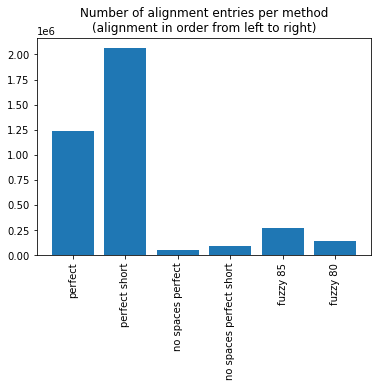

In [45]:
plt.bar(dev_aligned.keys(), dev_aligned.values())
plt.xticks(rotation = 90)
plt.title("Number of alignment entries per method\n(alignment in order from left to right)")

## Quality of Alignment

In [37]:
def print_sample(df, align_methods, sample_size, random_state=42):
    '''
    This function takes a certain amount of samples from the given (aligned) data with specified alignment
    methods and prints the street (Bottin Data), the matched street and the specific alignment method for 
    each sample.

    Parameters:
    :df: dataframe with aligned data
    :align_methods: all alignment methods that samples should be chosen from
    :sample_size: the number of samples to print
    :random_state: random state to make result reproducible
    '''
    df = df[df["align_method"].isin(align_methods)].sample(n=sample_size, random_state=random_state)
    data = zip(df["rue"], df["streetname"], df["align_method"])
    for i, entry in enumerate(data):
        print(f"{i+1}. bottin: {entry[0]}  -  matched: {entry[1]}   ({entry[2]})") 

### Perfect Alignment
Checking the code below, the alignment is correct in **100%** of the cases.

However, the alignment on the short streetnames is by nature sometimes ambiguous, because the short name was used in the Bottin Data.

In [38]:
print_sample(all_aligned, ["perfect", "perfect short"], 100)

1. bottin: Viala  -  matched: Rue Viala   (perfect short)
2. bottin: Duméril  -  matched: Rue Duméril   (perfect short)
3. bottin: Dames  -  matched: Allée des Dames, Route des Dames, Rue des Dames   (perfect short)
4. bottin: Laffitte  -  matched: Rue Laffitte   (perfect short)
5. bottin: Buffault  -  matched: Rue Buffault, Rue de Buffault   (perfect short)
6. bottin: Mazagran  -  matched: Avenue de Mazagran, Rue de Mazagran   (perfect short)
7. bottin: boul. Voltaire  -  matched: Boulevard Voltaire   (perfect)
8. bottin: Daumesnil  -  matched: Avenue Daumesnil, Villa Daumesnil   (perfect short)
9. bottin: Lamartine  -  matched: Rue Lamartine, Square Lamartine   (perfect short)
10. bottin: Petit-Carreau  -  matched: Rue du Petit Carreau   (perfect short)
11. bottin: Vannerie  -  matched: Rue de la Vannerie   (perfect short)
12. bottin: Crimée  -  matched: Avenue de Crimée, Passage de Crimée, Rue de Crimée   (perfect short)
13. bottin: Louis-Blanc  -  matched: Rue Louis Blanc   (perfec

### Alignment without spaces
The alignment of the samples below is correct in **100%** of the cases.

In [39]:
print_sample(all_aligned, ["no spaces perfect", "no spaces perfect short"], 100)

1. bottin: r. ChateauLandon  -  matched: Rue Chateau Landon   (no spaces perfect)
2. bottin: r. Boissyd'Anglas  -  matched: Rue Boissy d'Anglas   (no spaces perfect)
3. bottin: rue Perro net  -  matched: Rue Perronet   (no spaces perfect)
4. bottin: Faub. - SaintHonoré  -  matched: Rue du Faubourg Saint-Honoré   (no spaces perfect short)
5. bottin: Fauh.-StDenis  -  matched: Rue du Faubourg Saint Denis   (no spaces perfect short)
6. bottin: passage SteCroix-de-la-Bretonnerie  -  matched: Passage Sainte Croix de la Bretonnerie   (no spaces perfect)
7. bottin: quai de la Mégis serie  -  matched: Quai de la Mégisserie   (no spaces perfect)
8. bottin: r. de la TombeIssoire  -  matched: Rue de la Tombe Issoire   (no spaces perfect)
9. bottin: PetitMusc  -  matched: Rue du Petit Musc   (no spaces perfect short)
10. bottin: Page vin  -  matched: Rue Pagevin   (no spaces perfect short)
11. bottin: Moulindes-Prés  -  matched: Passage du Moulin des Prés, Rue du Moulin des Prés   (no spaces perfe

### Fuzzy alignment
#### Alignment with threshold 85 (85% of the two strings matched)

Correct: **80%**

Unclear if correct: **5%**
- 6 (two possibilities), 
- 11 ("avenue" matched with "rue" -> no avenue in data),
- 15 ("royale" matched with "rue" -> no royale in data),
- 21 ("cité" matched with "route" -> no cité in data),
- 26 ("route" matched with "rue" -> no route in data)

Incorrect matches: **15%**
- 3, 14, 22, 23, 24, 25, 30, 42, 47, 60, 65, 70, 78, 80, 82

(most of incorrect matches because there was not the correct streettype (e.g. "avenue" instead of "rue") and thus matched to different street entirely)



idea for improvement: write custom ratio which punishes non-alignments in last part of string more

In [40]:
print_sample(all_aligned, ["fuzzy 85"], 100)

1. bottin: r. d'Astorg  -  matched: Rue d'Astorg   (fuzzy 85)
2. bottin: r. Tanger  -  matched: Rue de Tanger   (fuzzy 85)
3. bottin: boul. de la Gare  -  matched: Boulevard de la Guyane   (fuzzy 85)
4. bottin: r. Augustin-Thierry  -  matched: Rue Augustin Thierry   (fuzzy 85)
5. bottin: r. Stephenson  -  matched: Rue Stephenson   (fuzzy 85)
6. bottin: Nve-St-Martin  -  matched: Rue Neuve Saint Martin   (fuzzy 85)
7. bottin: Nve-Coquenard  -  matched: Rue Coquenard   (fuzzy 85)
8. bottin: boul. Sébastopol  -  matched: Boulevard de Sébastopol   (fuzzy 85)
9. bottin: imp. d'Amsterdam  -  matched: Impasse d'Amsterdam   (fuzzy 85)
10. bottin: Nve-des-Martyrs  -  matched: Rue des Martyrs   (fuzzy 85)
11. bottin: avenue Chateaubriand  -  matched: Rue Chateaubriand   (fuzzy 85)
12. bottin: avenue Lamothe-Piquet  -  matched: Avenue de la Motte Piquet   (fuzzy 85)
13. bottin: quai des Célestins  -  matched: Quai des Célestins   (fuzzy 85)
14. bottin: imp. Laugier  -  matched: Impasse Lamier   (

#### Alignment of threshold between 80 and 85

correct: **46%**

incorrect: **39%**
- 2, 6, 8, 11, 12, 14, 17, 18, 24, 25, 26, 29, 31, 34, 38, 39, 42, 43, 44, 46, 51, 56, 59, 62, 66, 67, 69, 70, 78, 85, 86, 87, 88, 92, 95, 96, 97, 98, 100
- from this incorrect street type: **7%** (26, 29, 34, 42, 78, 87, 100)

unclear: **15%**
- 3 ("rue" instead of "chaussée")
- 4 ("rue" instead of "plâtre")
- 10 ("rue" instead of "grenelle")
- 37 ("cite" instead of "rue")
- 40 ("rue" instead of "cloître")
- 41 ("rue alphonse karr" instead of "rue alphonse")
- 48 ("rue" instead of "boulevard")
- 53 ("rue" instead of "rotonde")
- 54 ("rue" instead of "place")
- 57 ("rue" instead of "cloître")
- 73 ("rue" instead of "grénelle")
- 77 ("rue alphonse karr" instead of "rue alphonse")
- 91 ("rue" instead of "impasse")
- 93 ("rue" instead of "cité")
- 99 ("rue" instead of "cité")

-> many wrongly matched because "correct" street was not in dataset

In [41]:
#check for names in street dataset
#print([x for x in streets["streetname_prep"] if "honore" in x])

In [42]:
print_sample(all_aligned, ["fuzzy 80"], 100)

1. bottin: Vercingétoris  -  matched: Rue Vercingétorix   (fuzzy 80)
2. bottin: pass. Corbeau  -  matched: Passage Dareau   (fuzzy 80)
3. bottin: Chaussée-des-Martyrs  -  matched: Rue des Martyrs   (fuzzy 80)
4. bottin: Plâtre-du-Temple  -  matched: Rue du Temple   (fuzzy 80)
5. bottin: La Tour-d'Auvergne  -  matched: Rue de la Tour d'Auvergne   (fuzzy 80)
6. bottin: pass. Théruin  -  matched: Passage Thiéré   (fuzzy 80)
7. bottin: Four-St-Germain  -  matched: Boulevard Saint-Germain   (fuzzy 80)
8. bottin: r. du Moulin-de-Beurre  -  matched: Rue du Moulin des Prés   (fuzzy 80)
9. bottin: Faub.-St-Honorė  -  matched: Rue du Faubourg Saint-Honoré   (fuzzy 80)
10. bottin: Grenelle-St-Honoré  -  matched: Rue Saint Honoré   (fuzzy 80)
11. bottin: cité Jarry  -  matched: Cité Aubry   (fuzzy 80)
12. bottin: pass. du Saumon  -  matched: Passage du Sud   (fuzzy 80)
13. bottin: r. de la Chaussée-d'Antin  -  matched: Rue de la Chaussée d'Antin   (fuzzy 80)
14. bottin: r. Jouffroy  -  matched: Ru

Text(0.5, 1.0, 'Number of alignment entries (bars)\nand quality of alignment (line) per method\n[alignment in order from left to right]')

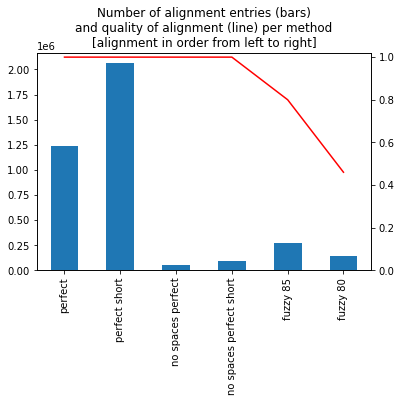

In [81]:
alignment_ratios = [1, 1, 1, 1, 0.8, 0.46]
df_aligned = {}
i=0
for key, value in dev_aligned.items():
    df_aligned[key] = [value, alignment_ratios[i]]
    i+=1
statistics = pd.DataFrame.from_dict(df_aligned)
statistics.iloc[0].plot(kind='bar')
statistics.iloc[1].plot(secondary_y=True, ylim=(0,1.02), rot=90, color="red")
plt.title("Number of alignment entries (bars)\nand quality of alignment (line) per method\n[alignment in order from left to right]")

## Not Aligned Data

In [43]:
Counter(not_aligned["rue"]).most_common(15)

[('Grenelle-St-Germain', 7945),
 ('Allemagne', 6733),
 ('Rochechouart', 5863),
 ('Amsterdam', 5361),
 ('Paradis-Poissonnière', 4334),
 ('St-Louis-Marais', 3883),
 ('Michodière', 3491),
 ('Pastourelle', 3253),
 ('Grenétat', 3010),
 ('Vanves', 2789),
 ('Vieux-Augustins', 2765),
 ('Ouest', 2665),
 ('Castiglione', 2363),
 ('Fontaine-St-Georges', 2331),
 ('Chaussée-d’Antin', 2236)]